In [151]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
from sklearn.model_selection import train_test_split

In [152]:
nltk.download('perluniprops')
nltk.download('nonbreaking_prefixes')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/lenis/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/lenis/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!
[nltk_data] Downloading package punkt to /home/lenis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lenis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [153]:
data = pd.read_excel('data.xlsx')

In [154]:
data

,textos,ODS
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,No dejar clara la naturaleza de estos riesgos ...,6
2,"Como resultado, un mayor y mejorado acceso al ...",13
3,Con el Congreso firmemente en control de la ju...,16
4,"Luego, dos secciones finales analizan las impl...",5
...,...,...
9651,Esto implica que el tiempo de las mujeres en e...,5
9652,"Sin embargo, estas fallas del mercado implican...",3
9653,El hecho de hacerlo y cómo hacerlo dependerá e...,9
9654,"Esto se destacó en el primer estudio de caso, ...",6


In [155]:
data['ODS'].value_counts()

ODS
16    1080
5     1070
4     1025
3      894
7      787
6      695
11     607
1      505
13     464
8      446
14     377
2      369
10     352
9      343
15     330
12     312
Name: count, dtype: int64

In [156]:
data['textos']

0       "Aprendizaje" y "educación" se consideran sinó...
1       No dejar clara la naturaleza de estos riesgos ...
2       Como resultado, un mayor y mejorado acceso al ...
3       Con el Congreso firmemente en control de la ju...
4       Luego, dos secciones finales analizan las impl...
                              ...                        
9651    Esto implica que el tiempo de las mujeres en e...
9652    Sin embargo, estas fallas del mercado implican...
9653    El hecho de hacerlo y cómo hacerlo dependerá e...
9654    Esto se destacó en el primer estudio de caso, ...
9655    Aunque existen programas para convertirse espe...
Name: textos, Length: 9656, dtype: object

In [157]:
X = data['textos']
y = data['ODS']

In [158]:
word_tokenize('This is a test','english')

['This', 'is', 'a', 'test']

In [159]:
x_train, x_test, y_train,y_test =train_test_split( X, y, test_size=0.2, random_state=42)

In [160]:
tokenized = x_train.apply(lambda x: word_tokenize(x,'spanish'))

In [161]:
tokenized

9620    [Esto, puede, lograrse, a, través, de, una, se...
4929    [Los, factores, sociales, y, culturales, son, ...
2302    [Los, centros, de, AEPI, de, calidad, responde...
8184    [Por, ejemplo, ,, en, Australia, ,, se, dispus...
5748    [Es, importante, destacar, que, el, uso, compa...
                              ...                        
5734    [No, más, del, 40, %, de, los, fondos, de, SP,...
5191    [Por, ejemplo, ,, con, el, umbral, de, pobreza...
5390    [Esto, convierte, al, turismo, en, una, indust...
860     [A, través, de, este, proceso, ,, se, crearon,...
7270    [Además, ,, la, red, de, distribución, no, se,...
Name: textos, Length: 7724, dtype: object

In [162]:
tokenizer = RegexpTokenizer(r'\w+')

In [163]:
tokenized_no_punct = x_train.apply(lambda x: tokenizer.tokenize(x))
tokenized_no_punct

9620    [Esto, puede, lograrse, a, través, de, una, se...
4929    [Los, factores, sociales, y, culturales, son, ...
2302    [Los, centros, de, AEPI, de, calidad, responde...
8184    [Por, ejemplo, en, Australia, se, dispuso, de,...
5748    [Es, importante, destacar, que, el, uso, compa...
                              ...                        
5734    [No, más, del, 40, de, los, fondos, de, SP, pu...
5191    [Por, ejemplo, con, el, umbral, de, pobreza, d...
5390    [Esto, convierte, al, turismo, en, una, indust...
860     [A, través, de, este, proceso, se, crearon, do...
7270    [Además, la, red, de, distribución, no, se, ma...
Name: textos, Length: 7724, dtype: object

In [164]:
nltk_stopwords = stopwords.words("spanish")
no_stopwords = tokenized_no_punct.apply(lambda x: [token for token in x if token not in nltk_stopwords])
no_stopwords

9620    [Esto, puede, lograrse, través, serie, medidas...
4929    [Los, factores, sociales, culturales, barrera,...
2302    [Los, centros, AEPI, calidad, responden, natur...
8184    [Por, ejemplo, Australia, dispuso, financiació...
5748    [Es, importante, destacar, uso, compartido, bi...
                              ...                        
5734    [No, 40, fondos, SP, pueden, destinarse, recur...
5191    [Por, ejemplo, umbral, pobreza, definido, 60, ...
5390    [Esto, convierte, turismo, industria, intensiv...
860     [A, través, proceso, crearon, dos, grupos, 1, ...
7270    [Además, red, distribución, mantiene, Alrededo...
Name: textos, Length: 7724, dtype: object

In [165]:
stemmer = PorterStemmer()
stemmed = no_stopwords.apply(lambda x: [stemmer.stem(token) for token in x])
stemmed

9620    [esto, pued, logrars, travé, seri, medida, mej...
4929    [lo, factor, social, cultural, barrera, import...
2302    [lo, centro, aepi, calidad, responden, natural...
8184    [por, ejemplo, australia, dispuso, financiació...
5748    [es, important, destacar, uso, compartido, bic...
                              ...                        
5734    [no, 40, fondo, sp, pueden, destinars, recurso...
5191    [por, ejemplo, umbral, pobreza, definido, 60, ...
5390    [esto, conviert, turismo, industria, intensiva...
860     [a, travé, proceso, crearon, do, grupo, 1, gru...
7270    [ademá, red, distribución, mantien, alrededor,...
Name: textos, Length: 7724, dtype: object

In [166]:
processed = stemmed.apply(lambda x: ' '.join(x))
processed

9620    esto pued logrars travé seri medida mejora pre...
4929    lo factor social cultural barrera important ac...
2302    lo centro aepi calidad responden naturaleza di...
8184    por ejemplo australia dispuso financiación sep...
5748    es important destacar uso compartido bicicleta...
                              ...                        
5734    no 40 fondo sp pueden destinars recurso humano...
5191    por ejemplo umbral pobreza definido 60 ingreso...
5390    esto conviert turismo industria intensiva coor...
860     a travé proceso crearon do grupo 1 grupo trata...
7270    ademá red distribución mantien alrededor 27 1 ...
Name: textos, Length: 7724, dtype: object

In [167]:
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(processed)
x_train

<7724x26859 sparse matrix of type '<class 'numpy.float64'>'
	with 401285 stored elements in Compressed Sparse Row format>

In [168]:
tsvd = TruncatedSVD(n_components=200)

In [169]:
tsvd.fit(x_train)

TruncatedSVD(n_components=200)

In [170]:
tsvd.components_

array([[ 4.46699364e-04,  2.23355417e-02,  1.40825588e-04, ...,
         8.62061373e-03,  7.09608496e-03,  4.11156830e-03],
       [-9.54455548e-04, -2.17647667e-02, -5.44180547e-04, ...,
        -1.43045786e-03, -4.52120578e-03,  6.94966195e-04],
       [ 2.96229887e-04, -8.73694869e-03,  2.97890412e-04, ...,
         1.17477877e-03,  5.50206511e-04,  5.28106912e-04],
       ...,
       [-1.38841282e-03, -9.55219888e-02, -1.07044535e-03, ...,
         3.83881793e-03,  7.41247102e-03, -4.69113828e-04],
       [-8.49838686e-04, -1.06223099e-01,  3.35764318e-04, ...,
         1.44780325e-02, -4.10122418e-03,  3.03483702e-05],
       [-2.23732335e-05, -8.57126663e-02, -9.21923519e-04, ...,
        -1.53207424e-03, -2.13956495e-03, -3.08455472e-04]])

In [171]:
x_train = tsvd.transform(x_train)

In [172]:
svm_classifier = SVC(kernel='linear')

In [173]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# y_train = data['ODS']

In [175]:
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [176]:
tokenized_no_punct_test = x_test.apply(lambda x: tokenizer.tokenize(x))
no_stopwords_test = tokenized_no_punct_test.apply(lambda x: [token for token in x if token not in nltk_stopwords])
stemmed_test = no_stopwords_test.apply(lambda x: [stemmer.stem(token) for token in x])
processed_test = stemmed_test.apply(lambda x: ' '.join(x))
x_test = vectorizer.transform(processed_test)
x_test = tsvd.transform(x_test)


In [177]:
# x_test = x_train
# y_test = y_train
y_pred = svm_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8737060041407867

In [178]:
print("Precisión del clasificador SVM: {:.2f}".format(accuracy))

Precisión del clasificador SVM: 0.87


In [179]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
x_test.shape

(1932, 200)

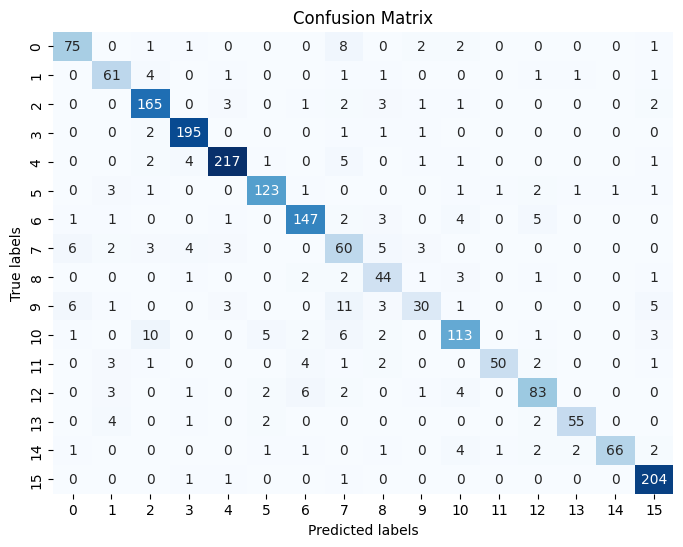

In [181]:
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()